# Insurance Claims- Fraud Detection
# Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Uploading all Libraries 

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib


In [2]:
insur=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
insur.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
insur.shape  ##no of rows and coloumn

(1000, 40)

In [5]:
insur.info()   ###tells about the datatype and null values present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
insur.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [7]:
insur.drop(['policy_number','incident_location','_c39'],axis=1,inplace=True)

In [8]:
insur.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Policy_number,incident_location are not requied do we drop these coloumn

# Simple Imputer Technique

In [9]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values='?',strategy="most_frequent")

In [10]:
n=['police_report_available','collision_type','property_damage']
for i in n:
    insur[i]=impute.fit_transform(insur[i].values.reshape(-1,1))

In [11]:
insur['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [12]:
insur['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [13]:
insur['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

# EDA

Comparing the feature and the taeget coloumn

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

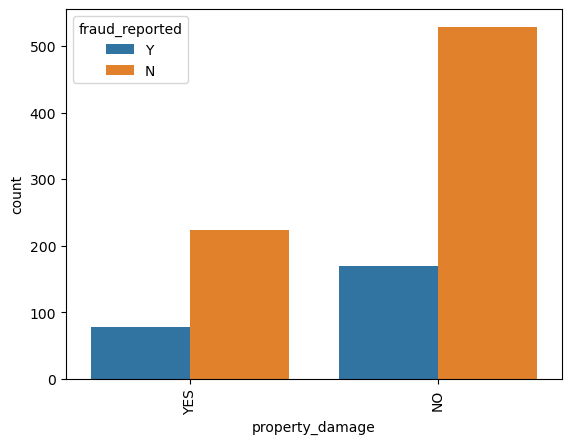

In [14]:
sns.countplot(insur['property_damage'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2]), [Text(0, 0, 'OH'), Text(1, 0, 'IN'), Text(2, 0, 'IL')])

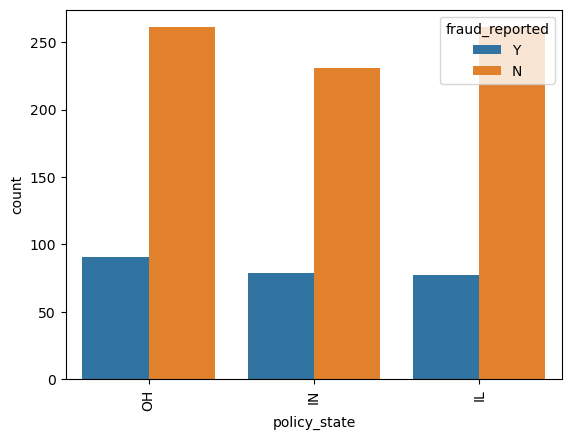

In [15]:
sns.countplot(insur['policy_state'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, '250/500'), Text(1, 0, '100/300'), Text(2, 0, '500/1000')])

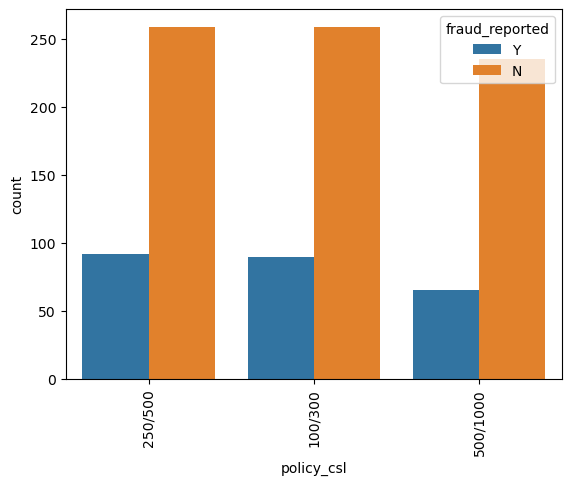

In [16]:
sns.countplot(insur['policy_csl'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'MALE'), Text(1, 0, 'FEMALE')])

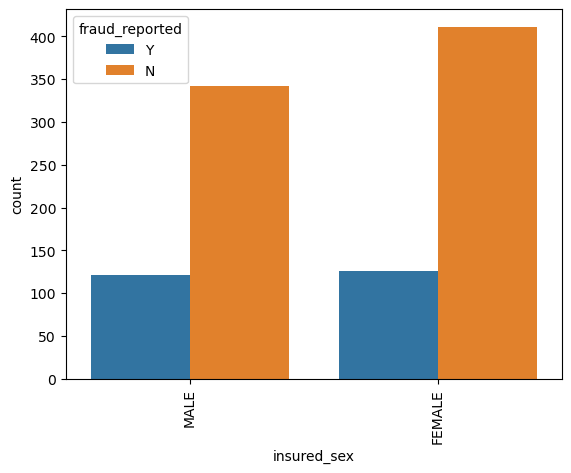

In [17]:
sns.countplot(insur['insured_sex'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

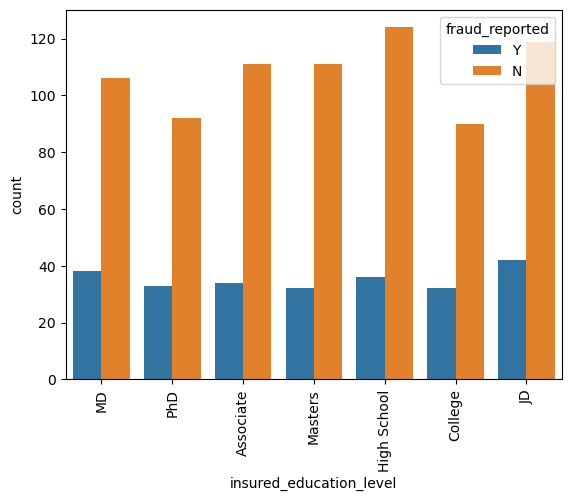

In [18]:
sns.countplot(insur['insured_education_level'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

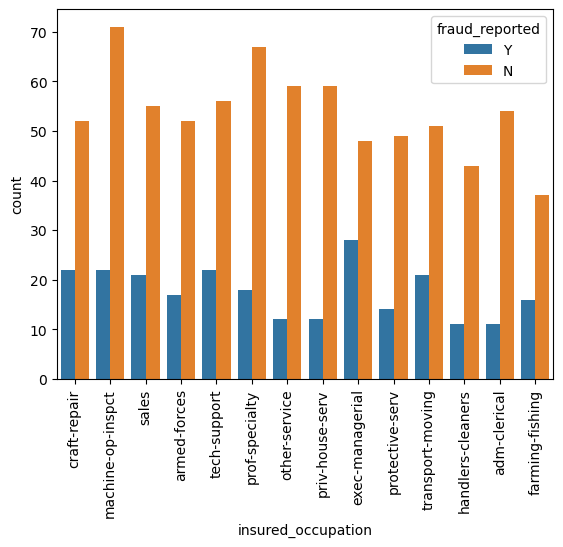

In [19]:
sns.countplot(insur['insured_occupation'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

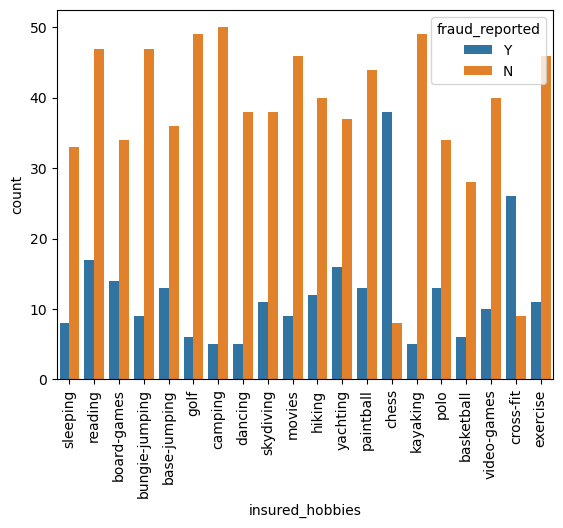

In [20]:
sns.countplot(insur['insured_hobbies'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

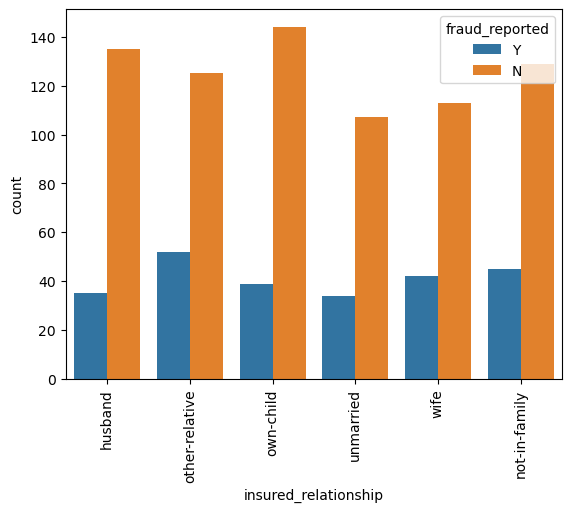

In [21]:
sns.countplot(insur['insured_relationship'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '25-01-2015'),
  Text(1, 0, '21-01-2015'),
  Text(2, 0, '22-02-2015'),
  Text(3, 0, '10-01-2015'),
  Text(4, 0, '17-02-2015'),
  Text(5, 0, '02-01-2015'),
  Text(6, 0, '13-01-2015'),
  Text(7, 0, '27-02-2015'),
  Text(8, 0, '30-01-2015'),
  Text(9, 0, '05-01-2015'),
  Text(10, 0, '06-01-2015'),
  Text(11, 0, '15-02-2015'),
  Text(12, 0, '22-01-2015'),
  Text(13, 0, '08-01-2015'),
  Text(14, 0, '15-01-2015'),
  Text(15, 0, '29-01-2015'),
  Text(16, 0, '19-01-2015'),
  Text(17, 0, '01-01-2015'),
  Text(18, 0, '10-02-2015'),
  Text(19, 0, '11-01-2015'),
  Text(20, 0, '24-02-2015'),
  Text(21, 0, '09-01-2015'),
  Text(22, 0, '28-01-2015'),
  Text(23, 0, '07-01-2015'),
  Text(24, 0, '18-01-2015'),
  Text(25, 

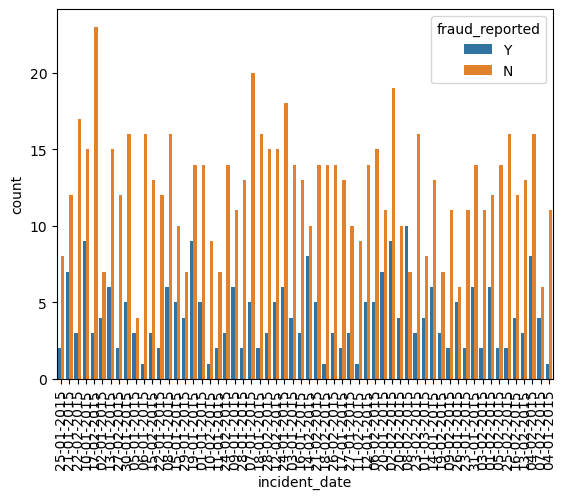

In [22]:
sns.countplot(insur['incident_date'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

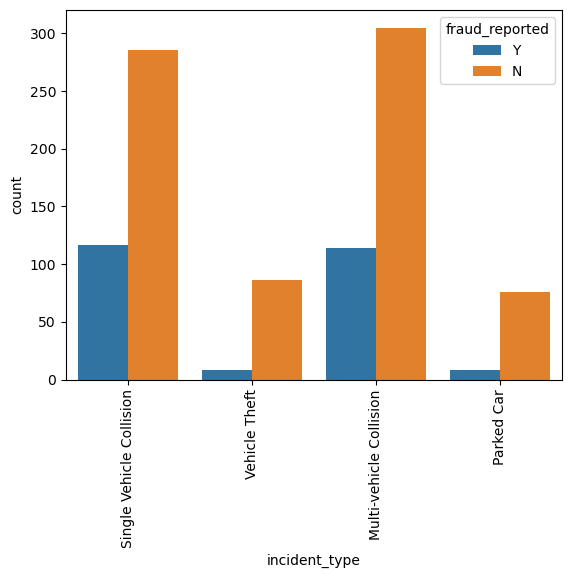

In [23]:
sns.countplot(insur['incident_type'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Rear Collision'),
  Text(2, 0, 'Front Collision')])

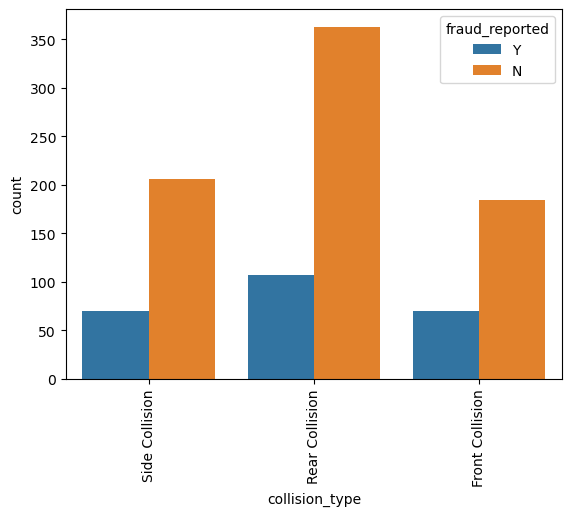

In [24]:
sns.countplot(insur['collision_type'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Major Damage'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Total Loss'),
  Text(3, 0, 'Trivial Damage')])

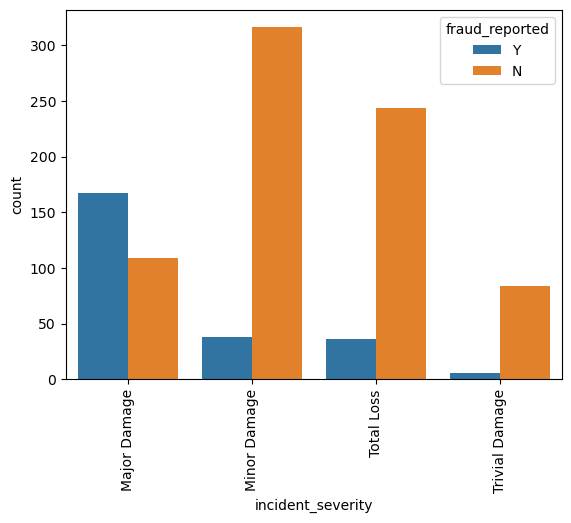

In [25]:
sns.countplot(insur['incident_severity'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

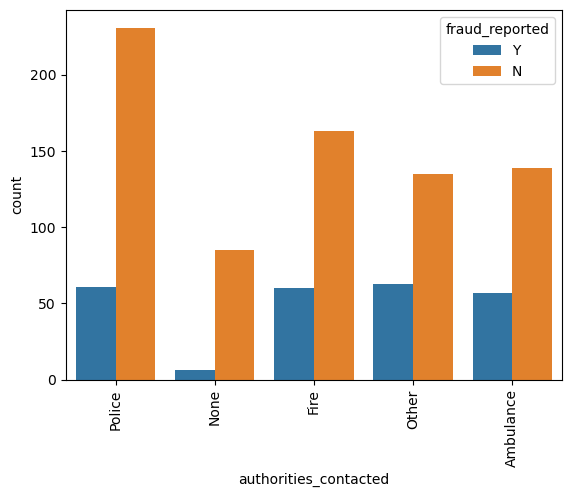

In [26]:
sns.countplot(insur['authorities_contacted'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

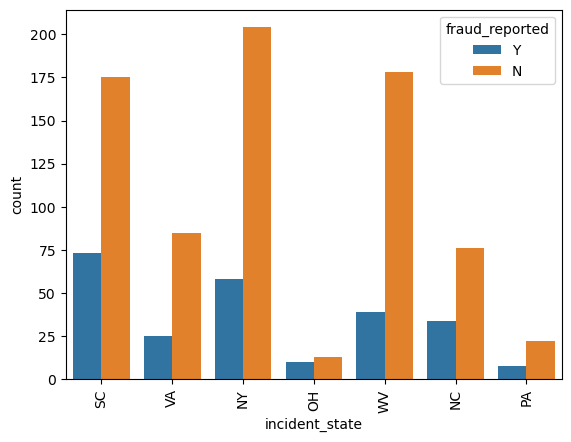

In [27]:
sns.countplot(insur['incident_state'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

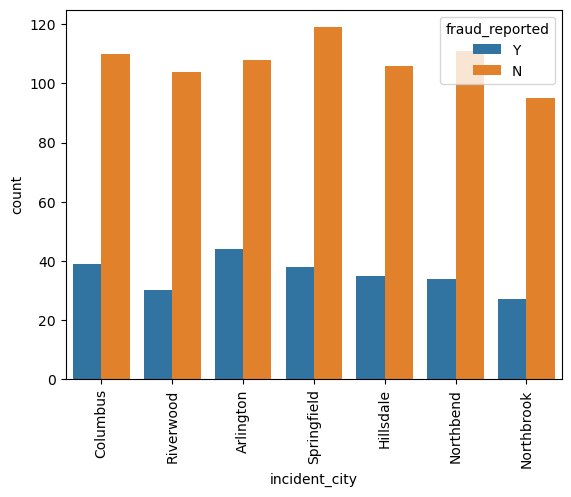

In [28]:
sns.countplot(insur['incident_city'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

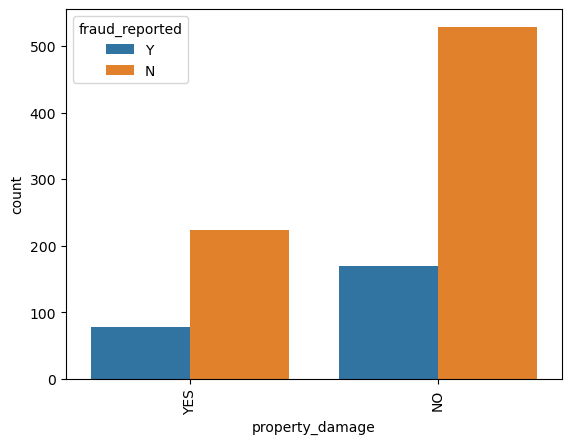

In [29]:
sns.countplot(insur['property_damage'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

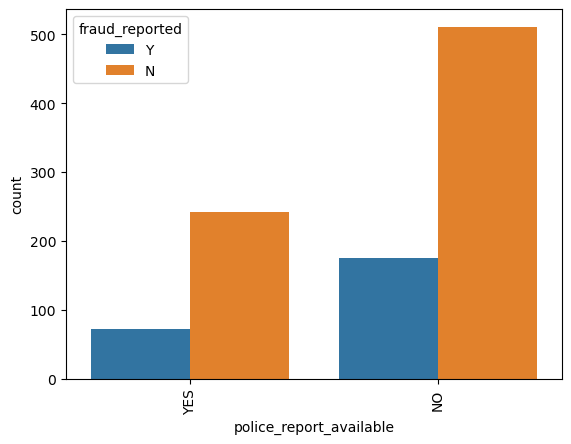

In [30]:
sns.countplot(insur['police_report_available'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

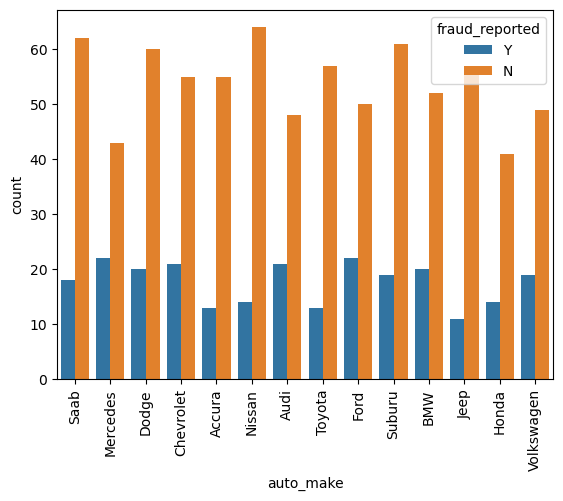

In [31]:
sns.countplot(insur['auto_make'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

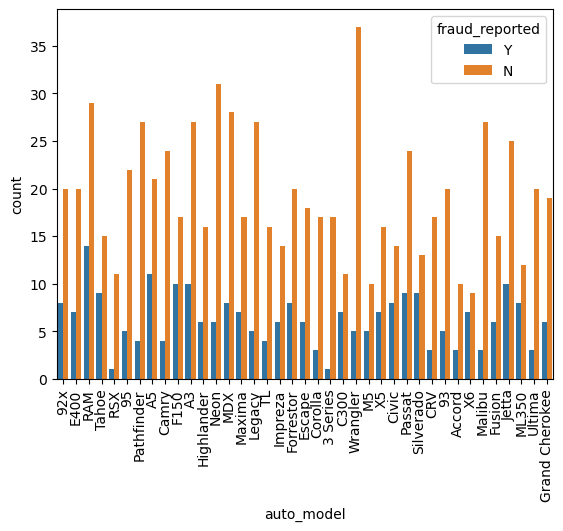

In [32]:
sns.countplot(insur['auto_model'],hue=insur['fraud_reported'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

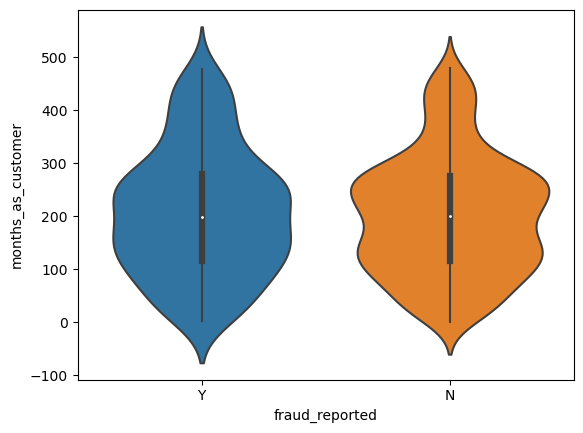

In [33]:
sns.violinplot(x="fraud_reported", y="months_as_customer", data=insur)

# Comparing and visualizing continuous data

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

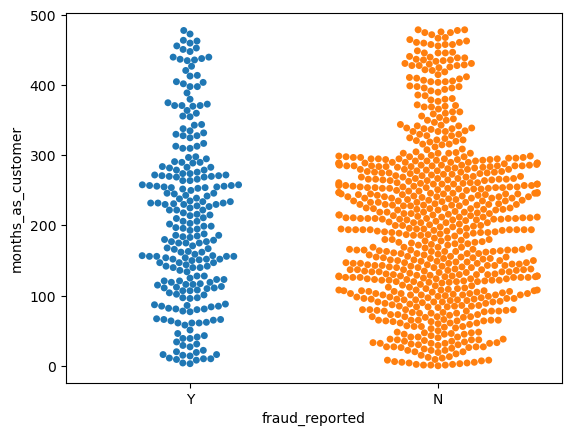

In [34]:
sns.swarmplot(x="fraud_reported", y="months_as_customer", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

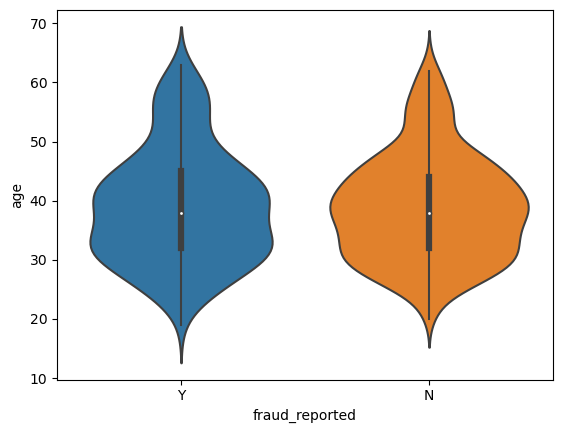

In [35]:
sns.violinplot(x="fraud_reported", y="age", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

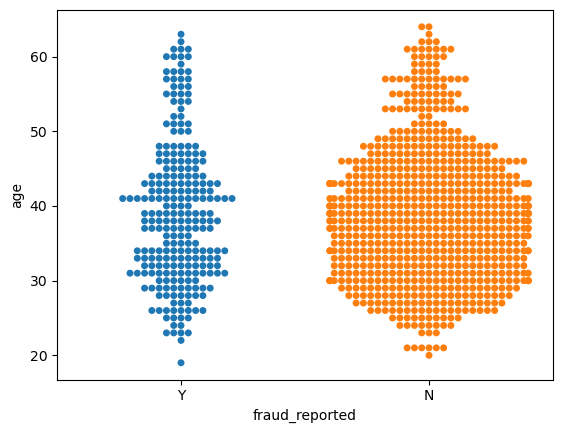

In [36]:
sns.swarmplot(x="fraud_reported", y="age", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_deductable'>

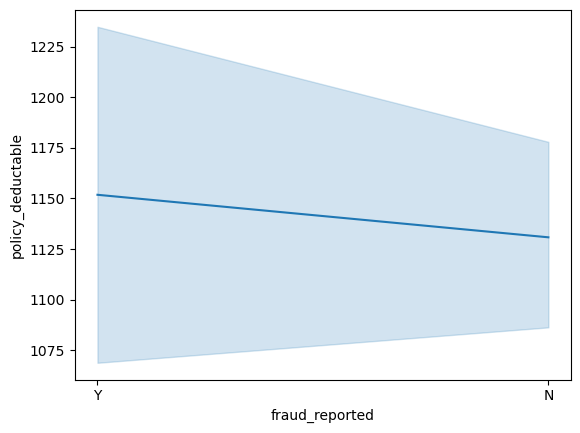

In [37]:
sns.lineplot(x="fraud_reported", y="policy_deductable", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

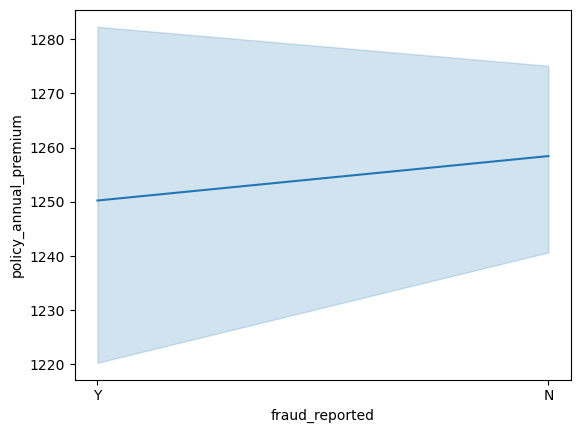

In [38]:
sns.lineplot(x="fraud_reported", y="policy_annual_premium", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

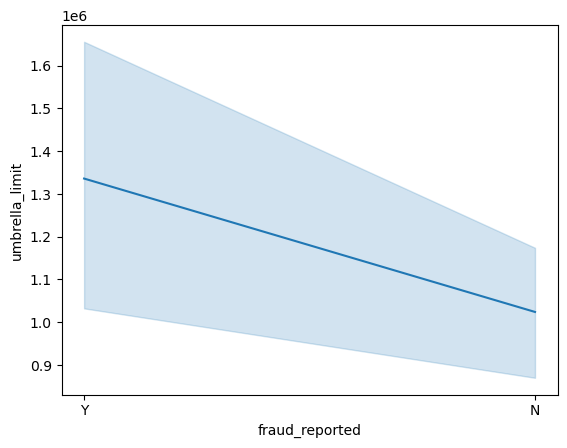

In [39]:
sns.lineplot(x="fraud_reported", y="umbrella_limit", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

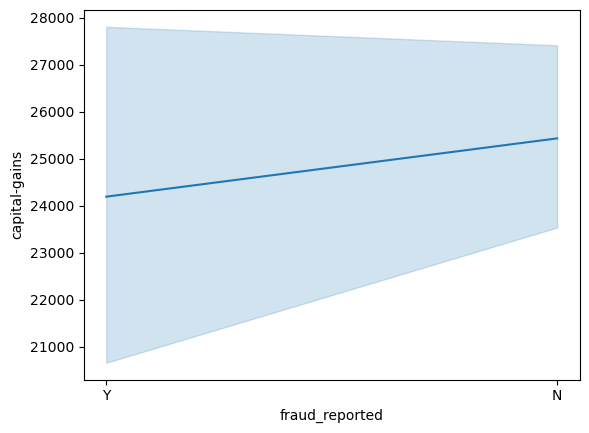

In [40]:
sns.lineplot(x="fraud_reported", y="capital-gains", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

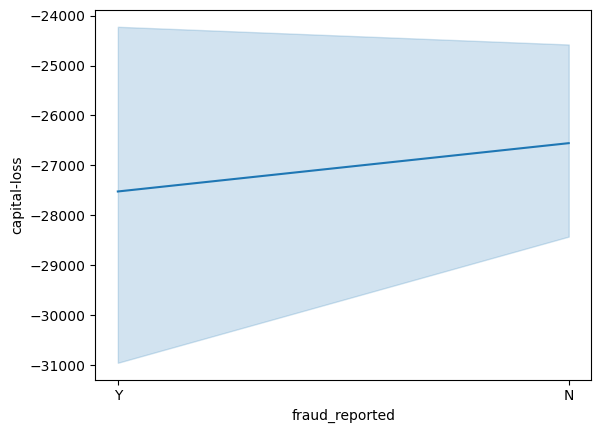

In [41]:
sns.lineplot(x="fraud_reported", y="capital-loss", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

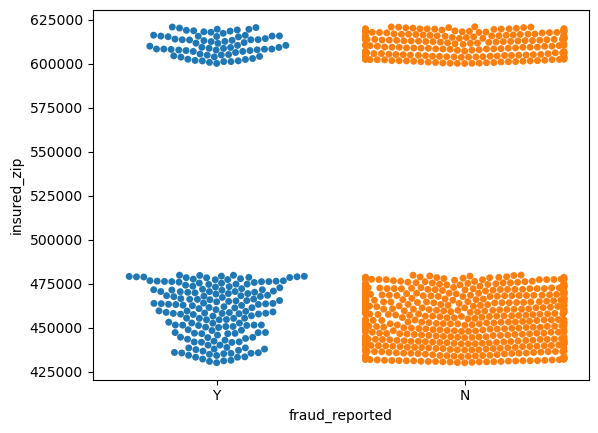

In [42]:
sns.swarmplot(x="fraud_reported", y="insured_zip", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

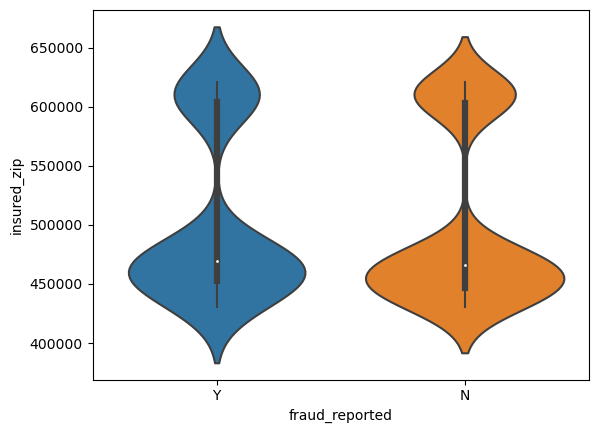

In [43]:
sns.violinplot(x="fraud_reported", y="insured_zip", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

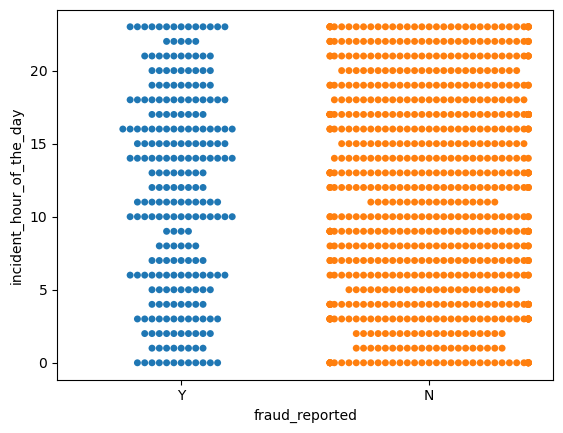

In [44]:
sns.swarmplot(x="fraud_reported", y="incident_hour_of_the_day", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

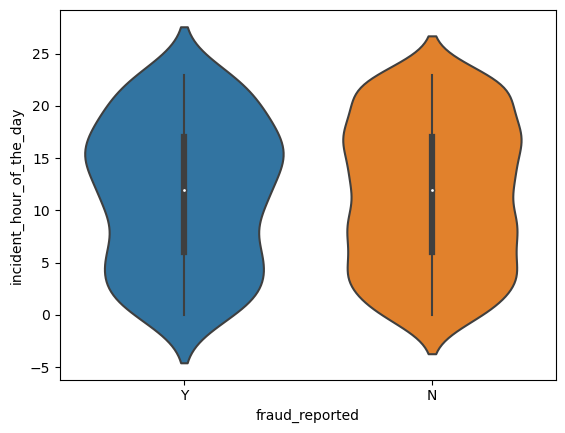

In [45]:
sns.violinplot(x="fraud_reported", y="incident_hour_of_the_day", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

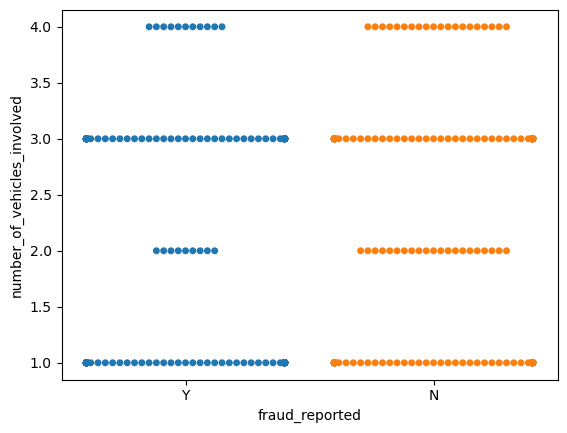

In [46]:
sns.swarmplot(x="fraud_reported", y="number_of_vehicles_involved", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

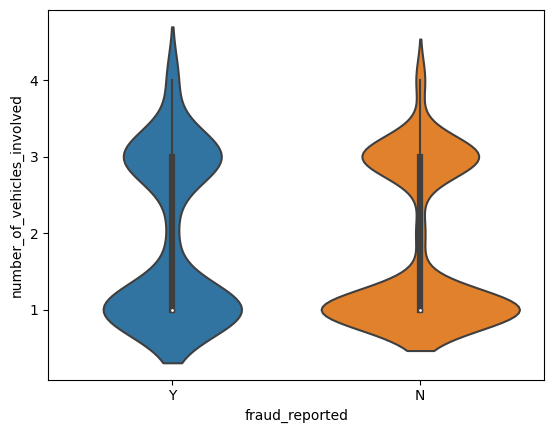

In [47]:
sns.violinplot(x="fraud_reported", y="number_of_vehicles_involved", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='witnesses'>

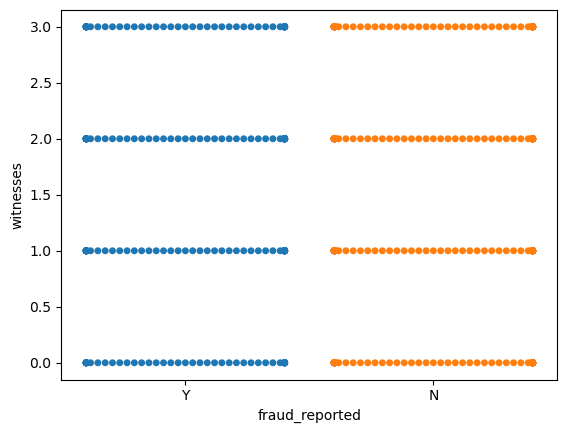

In [48]:
sns.swarmplot(x="fraud_reported", y="witnesses", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

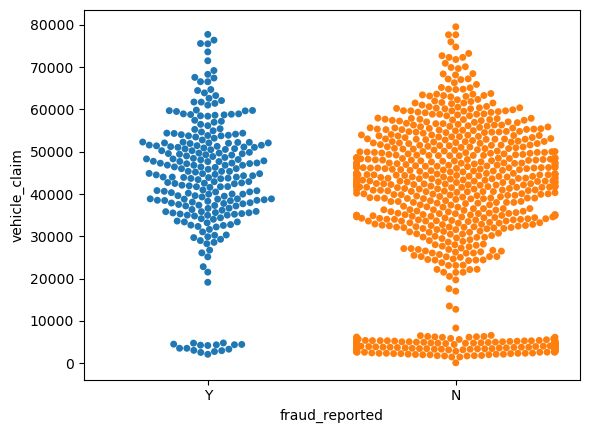

In [49]:
sns.swarmplot(x="fraud_reported", y="vehicle_claim", data=insur)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

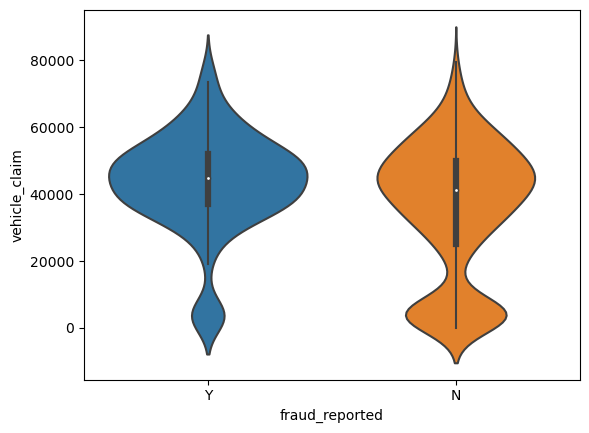

In [50]:
sns.violinplot(x="fraud_reported", y="vehicle_claim", data=insur)

# statistical Analysis

In [51]:
insur.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [52]:
insur.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


we can see skewness is present in multiple coloumns

# Label Encoder

In [53]:
le=LabelEncoder()  ###  used to convert object into interger

In [54]:
lobject=['property_damage','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model','fraud_reported']
for i in lobject:
    insur[i]=le.fit_transform(insur[i])

In [55]:
insur["policy_bind_date"]=le.fit_transform(insur["policy_bind_date"])

In [56]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   int32  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

# Heatmap

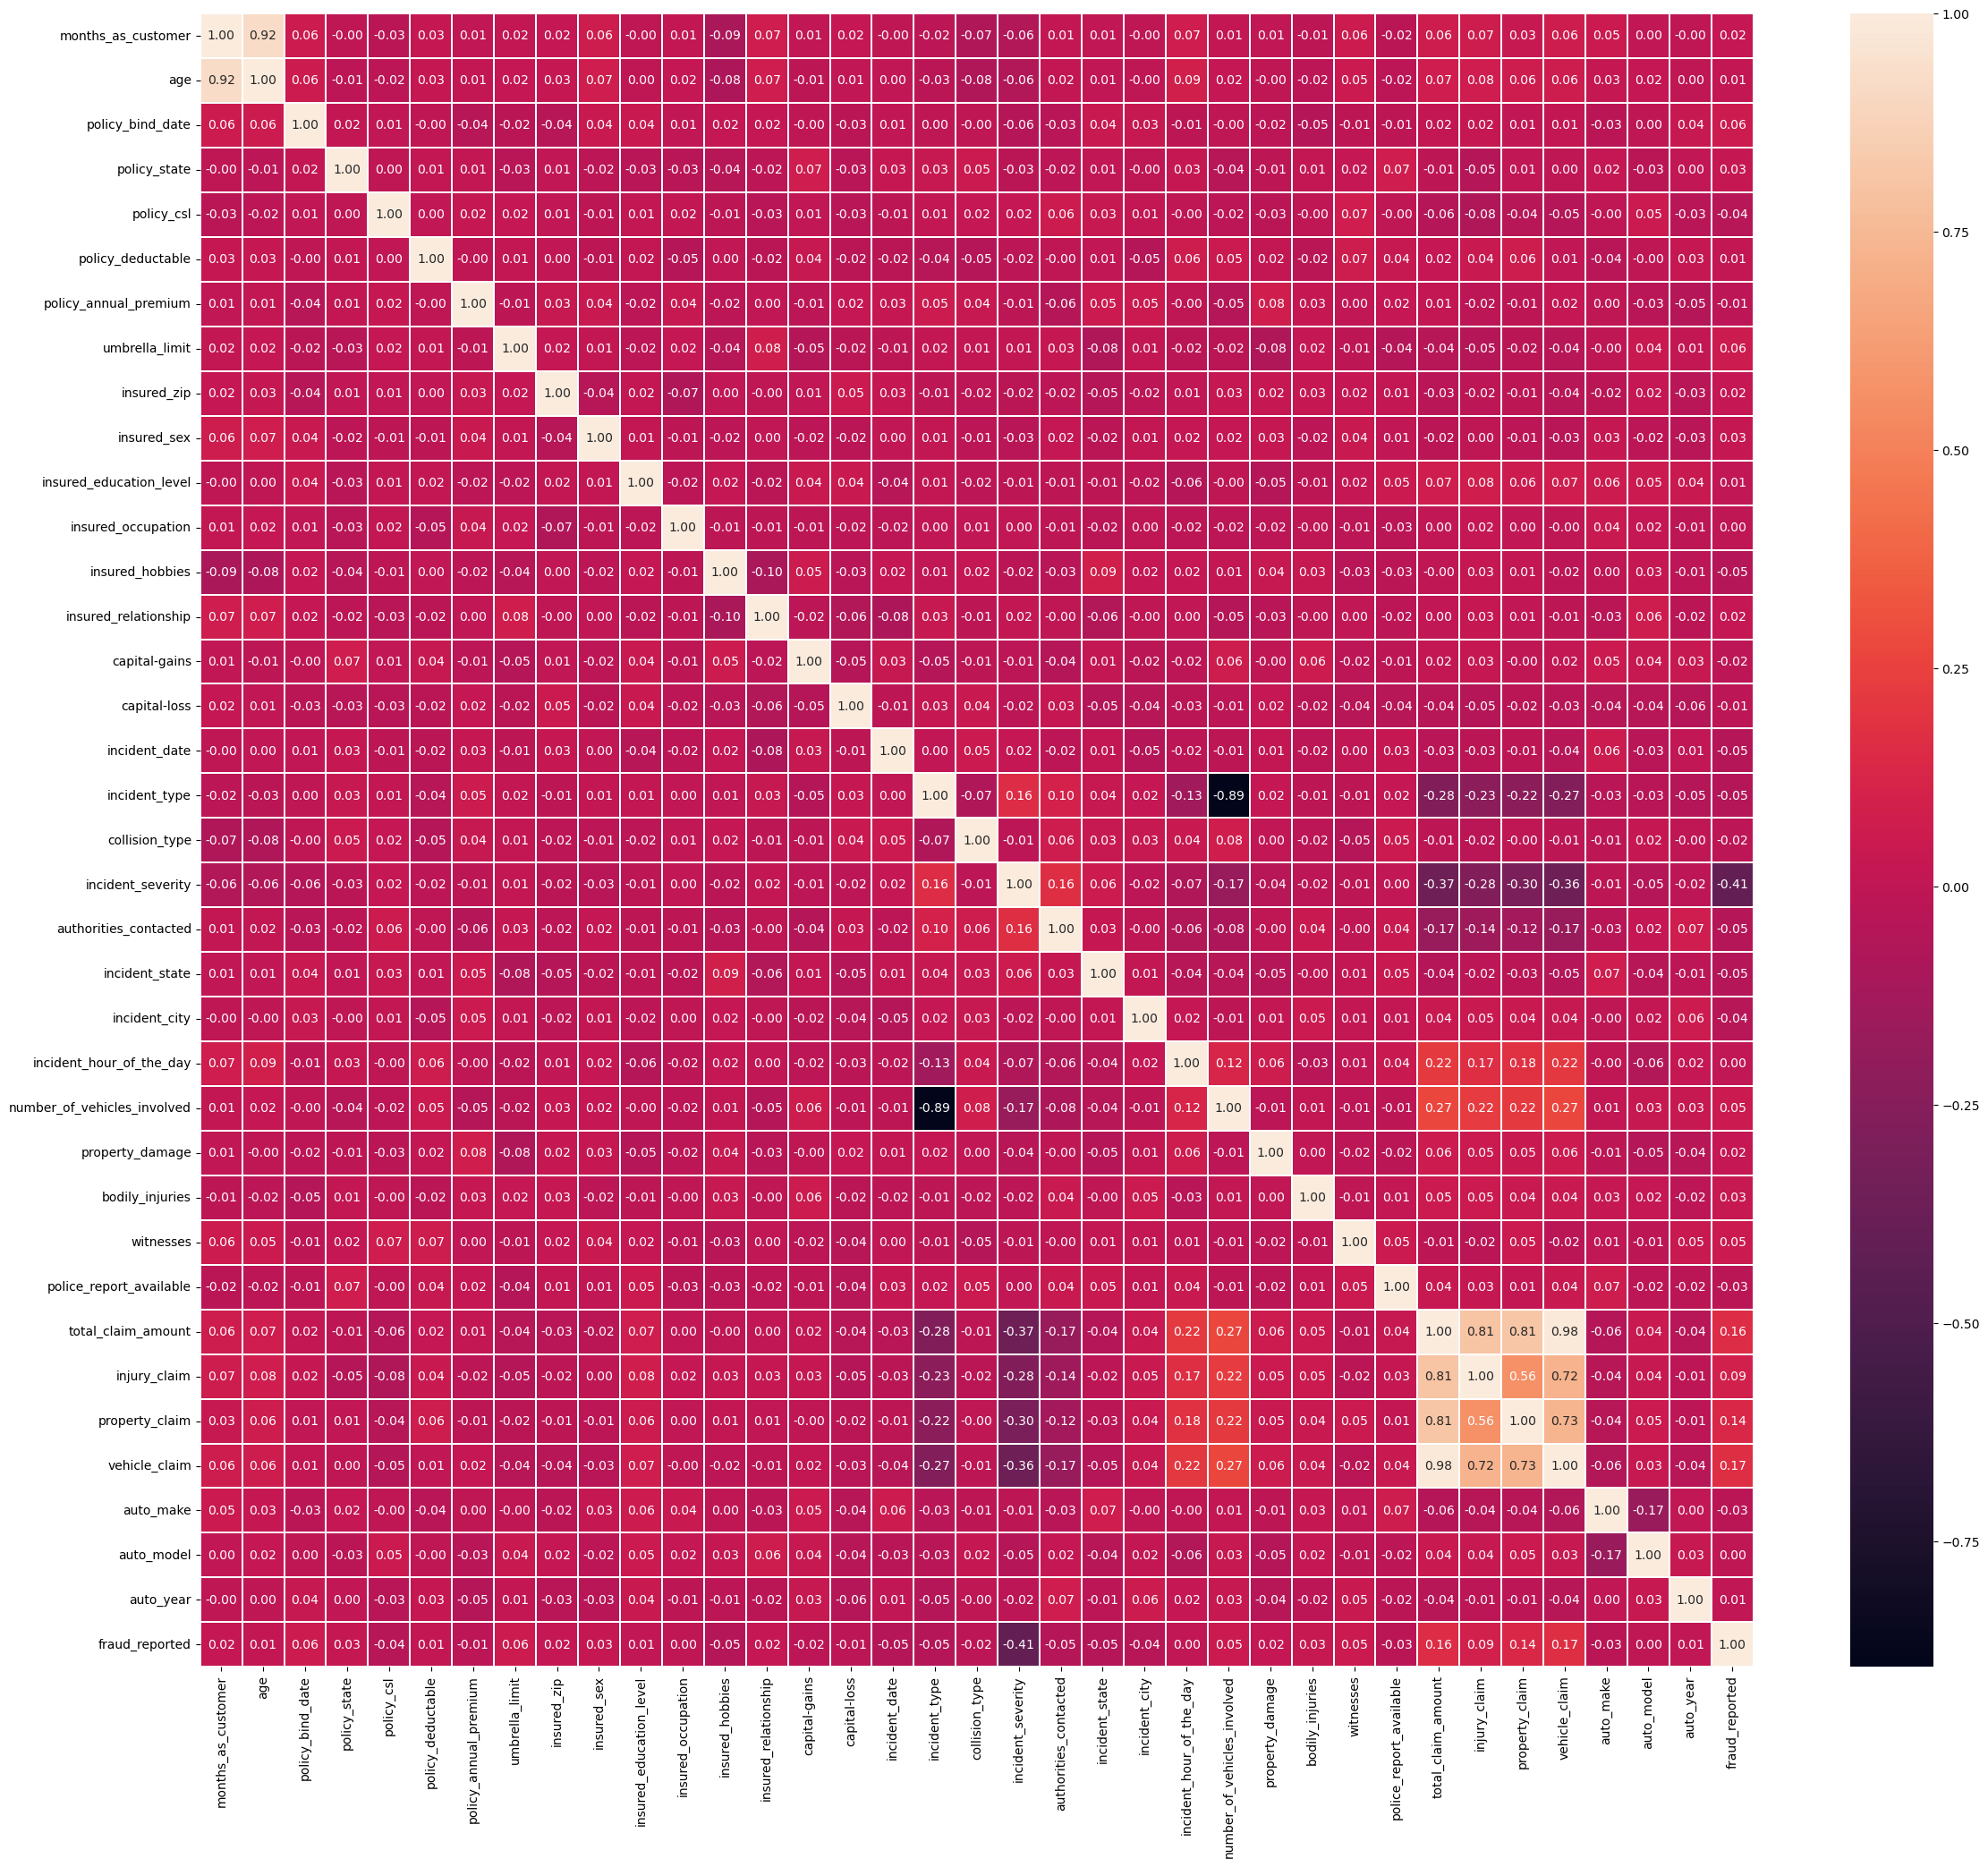

In [57]:
plt.figure(figsize=(28,24))
sns.heatmap(insur.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

From the above heatmap we can see multicollinearity is present

In [58]:
insur.corr()["fraud_reported"].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
insured_zip                    0.019368
months_as_customer             0.020544
insured_relationship           0.021043


In [59]:
insur.drop(["auto_model","insured_occupation","auto_year"],axis=1,inplace=True)

In [60]:
insur.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,532,2,1,1000,1406.91,0,466132,1,...,1,1,2,1,71610,6510,13020,52080,10,1
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,0,5070,780,780,3510,8,1
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,...,0,2,3,0,34650,7700,3850,23100,4,0
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,...,0,1,2,0,63400,6340,6340,50720,3,1
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,...,0,0,1,0,6500,1300,650,4550,0,0


# VIF

In [61]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [63]:
x=insur.drop(["fraud_reported"],axis=1)
y=insur["fraud_reported"]

In [64]:
calc_vif(x)

,Variables,VIF factor
0,months_as_customer,24.183042
1,age,104.391522
2,policy_bind_date,3.980532
3,policy_state,2.545056
4,policy_csl,2.443914
5,policy_deductable,4.535504
6,policy_annual_premium,25.699260
7,umbrella_limit,1.265494
8,insured_zip,39.606489
9,insured_sex,1.910079


In [65]:
insur.drop(["age","injury_claim","property_claim","total_claim_amount"],axis=1,inplace=True)

we drop above mentioned coloumn to remove multicollinarity problem

In [66]:
insur.head()

,months_as_customer,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim,auto_make,fraud_reported
0,328,532,2,1,1000,1406.91,0,466132,1,4,...,1,5,1,1,1,2,1,52080,10,1
1,228,821,1,1,2000,1197.22,5000000,468176,1,4,...,5,8,1,0,0,0,0,3510,8,1
2,134,186,2,0,2000,1413.14,5000000,430632,0,6,...,1,7,3,0,2,3,0,23100,4,0
3,256,766,0,1,2000,1415.74,6000000,608117,0,6,...,0,5,1,0,1,2,0,50720,3,1
4,228,181,0,2,1000,1583.91,6000000,610706,1,0,...,0,20,1,0,0,1,0,4550,0,0


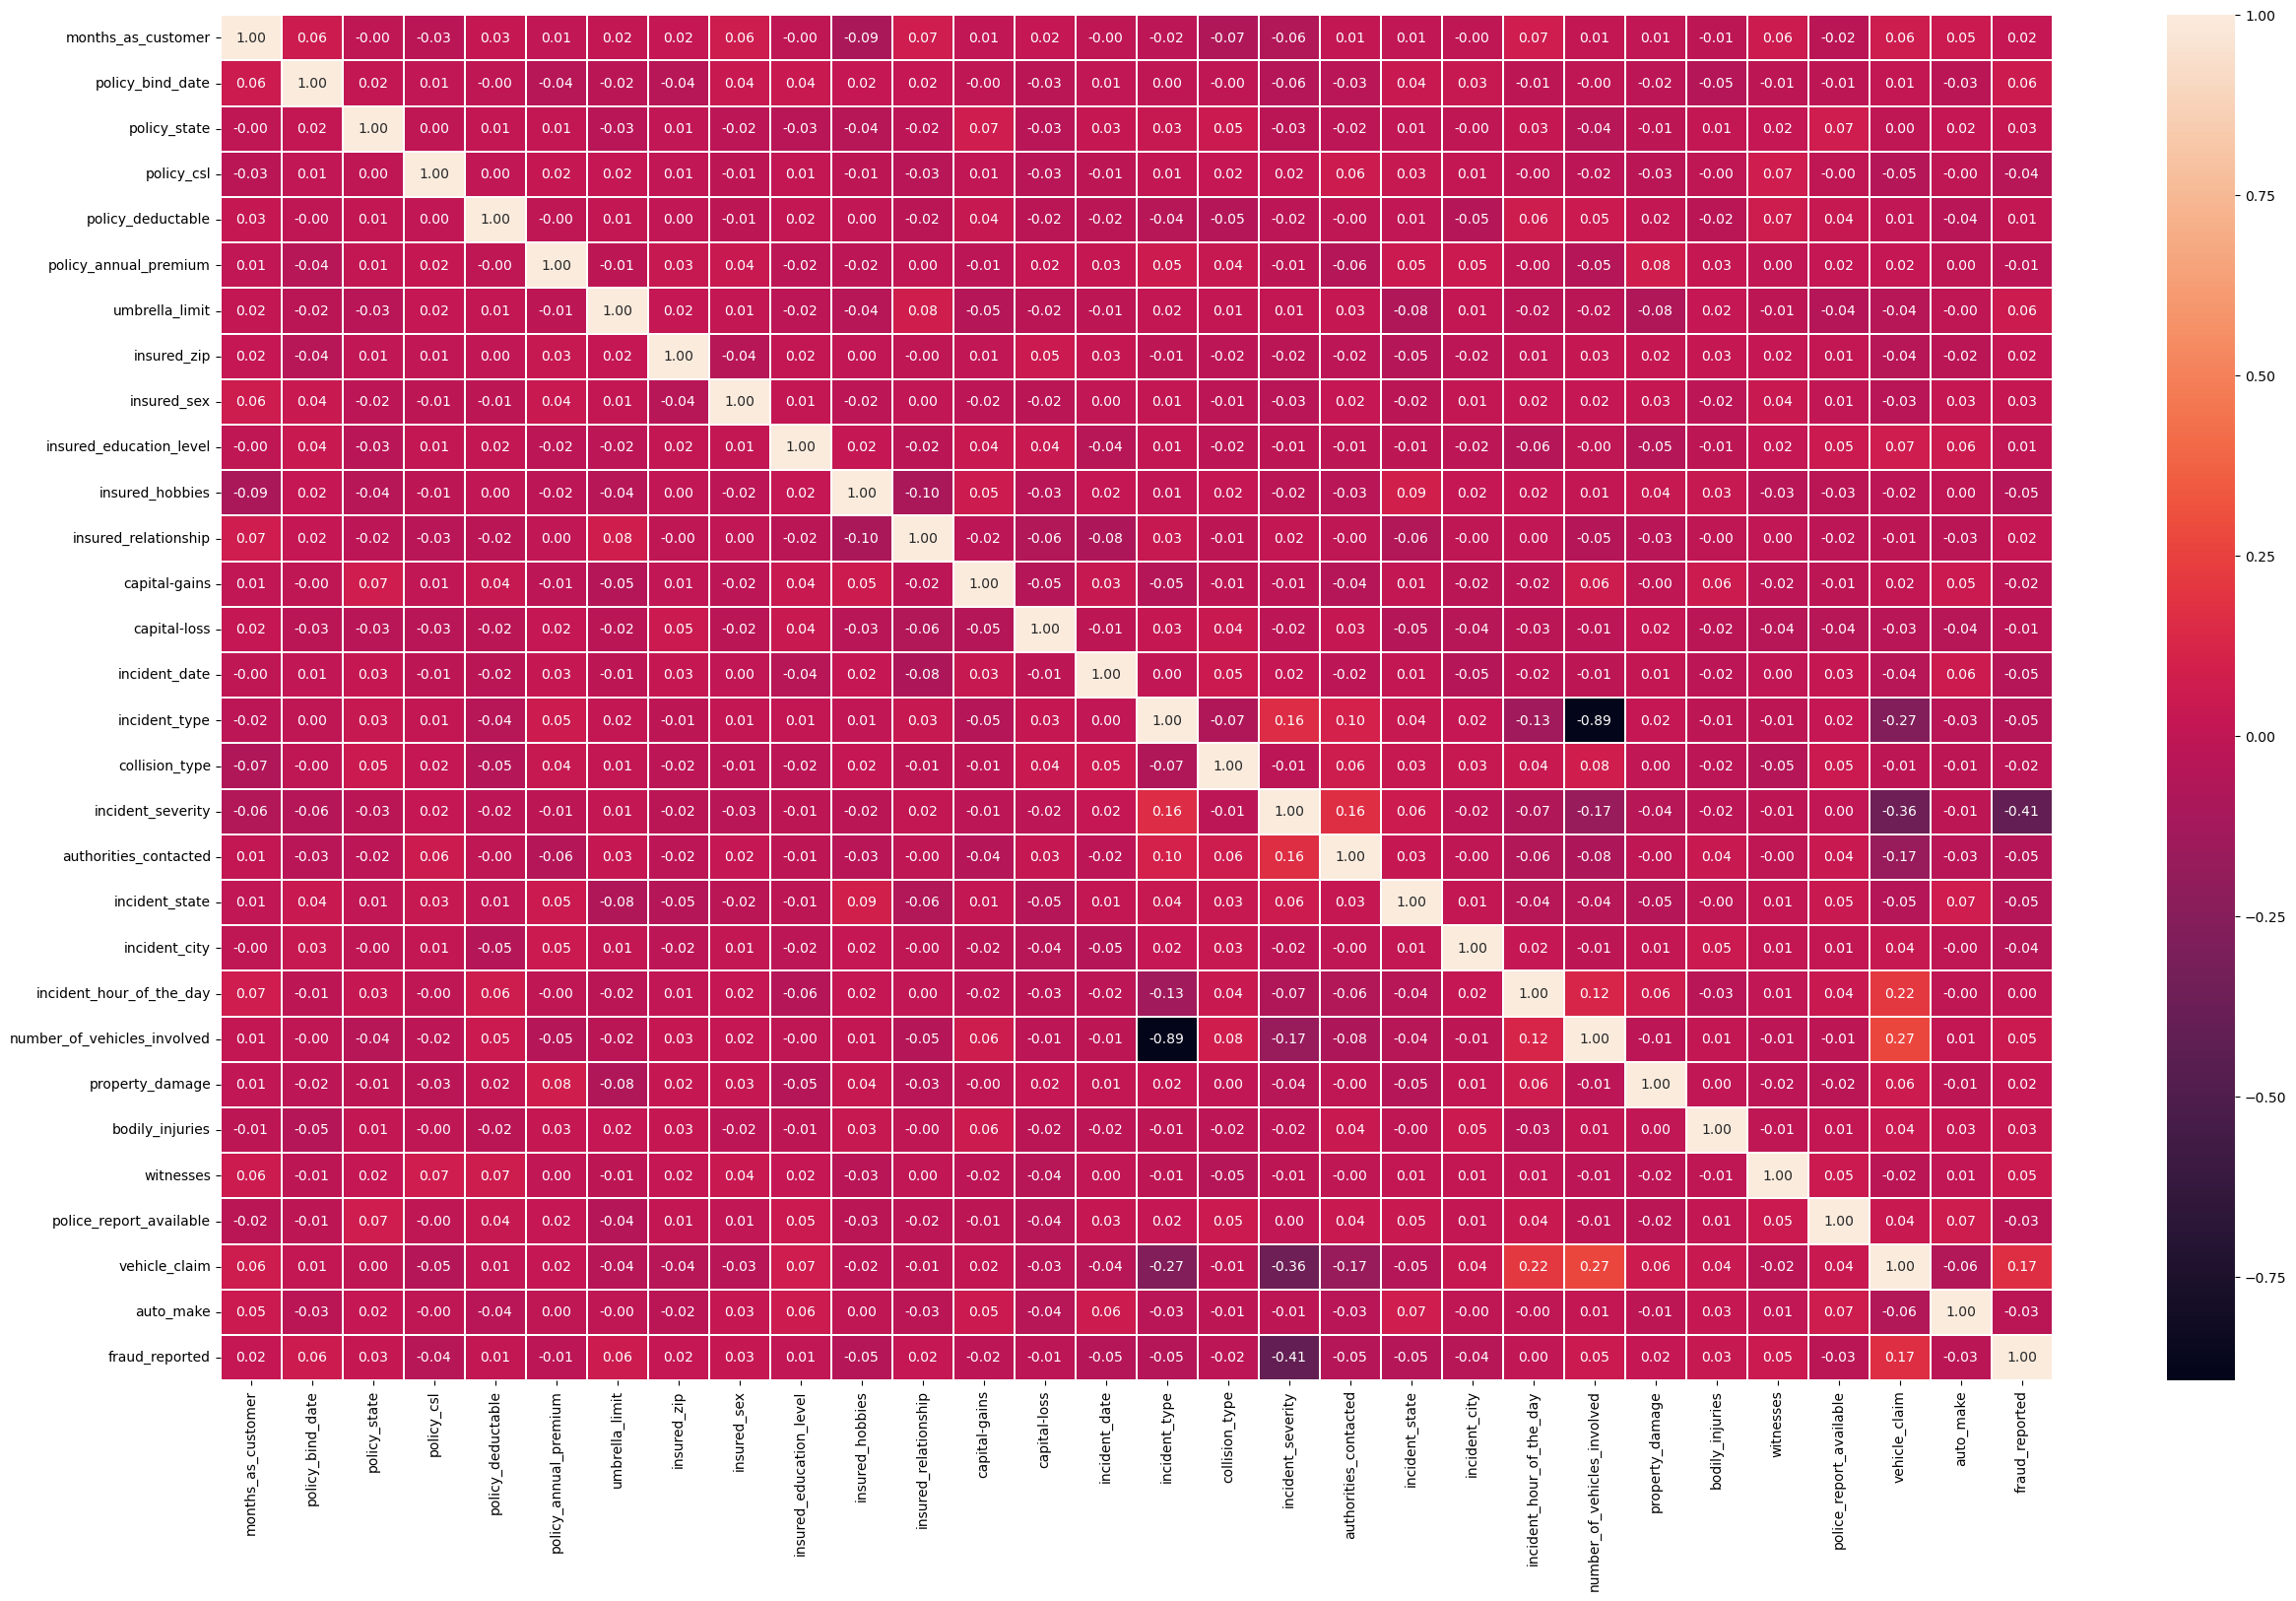

In [67]:
plt.figure(figsize=(30,18))
sns.heatmap(insur.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

# Checking the outliers

In [68]:
z=np.abs(zscore(insur))

In [69]:
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
        700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6,  6,  6,  6,  5, 13,  6,
         6,  6], dtype=int64))

In [70]:
insurnew=insur[(z<3).all(axis=1)]

In [71]:
insurnew.shape

(981, 30)

% data loss=(1000-981)/1000 * 100= 1.9%

# Skewness of data

In [72]:
insurnew.skew().sort_values()

vehicle_claim                 -0.622470
capital-loss                  -0.378586
incident_state                -0.150334
authorities_contacted         -0.115766
insured_hobbies               -0.063050
incident_hour_of_the_day      -0.040633
policy_state                  -0.040033
collision_type                -0.034340
auto_make                     -0.028323
bodily_injuries                0.001877
incident_date                  0.002752
policy_bind_date               0.004344
insured_education_level        0.006225
witnesses                      0.024567
policy_annual_premium          0.036211
incident_city                  0.042484
insured_relationship           0.079116
incident_type                  0.088647
policy_csl                     0.096323
insured_sex                    0.141238
incident_severity              0.278443
months_as_customer             0.360876
capital-gains                  0.464155
policy_deductable              0.477577
number_of_vehicles_involved    0.511409


In [73]:

from sklearn.preprocessing import power_transform
x=insurnew.drop(["fraud_reported"],axis=1)
y=insurnew["fraud_reported"]
x=power_transform(x,method='yeo-johnson')

In [74]:
insurnew.skew().sort_values()

vehicle_claim                 -0.622470
capital-loss                  -0.378586
incident_state                -0.150334
authorities_contacted         -0.115766
insured_hobbies               -0.063050
incident_hour_of_the_day      -0.040633
policy_state                  -0.040033
collision_type                -0.034340
auto_make                     -0.028323
bodily_injuries                0.001877
incident_date                  0.002752
policy_bind_date               0.004344
insured_education_level        0.006225
witnesses                      0.024567
policy_annual_premium          0.036211
incident_city                  0.042484
insured_relationship           0.079116
incident_type                  0.088647
policy_csl                     0.096323
insured_sex                    0.141238
incident_severity              0.278443
months_as_customer             0.360876
capital-gains                  0.464155
policy_deductable              0.477577
number_of_vehicles_involved    0.511409


# Standard scaler

In [75]:
sc=StandardScaler()
dfx=sc.fit_transform(x)
dfx.mean()

6.11912440722783e-18

In [76]:
y.value_counts()

0    741
1    240
Name: fraud_reported, dtype: int64

# Balancing the Target Variable

In [77]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [78]:
y.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

# Building the model

In [79]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 82.82828282828282 on Random State 11


In [80]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=900)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [81]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
# Logistic Regression

model=LogisticRegression()
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       197
           1       0.76      0.81      0.79       174

    accuracy                           0.79       371
   macro avg       0.79      0.79      0.79       371
weighted avg       0.79      0.79      0.79       371

Accuracy Score: 79.24528301886792
Cross Validation Score: 76.85799435799436

Accuracy Score - Cross Validation Score is 2.3872886608735655


In [83]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       197
           1       0.84      0.85      0.85       174

    accuracy                           0.85       371
   macro avg       0.85      0.85      0.85       371
weighted avg       0.85      0.85      0.85       371

Accuracy Score: 85.44474393530997
Cross Validation Score: 84.01651651651652

Accuracy Score - Cross Validation Score is 1.4282274187934547


In [84]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       197
           1       0.91      0.93      0.92       174

    accuracy                           0.92       371
   macro avg       0.92      0.92      0.92       371
weighted avg       0.92      0.92      0.92       371

Accuracy Score: 92.18328840970351
Cross Validation Score: 88.13427063427064

Accuracy Score - Cross Validation Score is 4.049017775432873


In [85]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.29      0.44       197
           1       0.54      0.96      0.69       174

    accuracy                           0.60       371
   macro avg       0.72      0.62      0.57       371
weighted avg       0.73      0.60      0.56       371

Accuracy Score: 60.37735849056604
Cross Validation Score: 65.86177086177086

Accuracy Score - Cross Validation Score is -5.484412371204826


In [86]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       197
           1       0.84      0.88      0.86       174

    accuracy                           0.87       371
   macro avg       0.86      0.87      0.87       371
weighted avg       0.87      0.87      0.87       371

Accuracy Score: 86.52291105121293
Cross Validation Score: 84.95950495950497

Accuracy Score - Cross Validation Score is 1.5634060917079609


In [87]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.93      0.94      0.93       174

    accuracy                           0.94       371
   macro avg       0.93      0.94      0.94       371
weighted avg       0.94      0.94      0.94       371

Accuracy Score: 93.53099730458221
Cross Validation Score: 90.76212576212576

Accuracy Score - Cross Validation Score is 2.768871542456452


# Hyperparameter Tuning

In [88]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 213, 1000],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 500, 700]
             }

In [89]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [90]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'n_estimators': [300, 500, 700], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 213, 1000]})

In [91]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 500,
 'n_jobs': -2,
 'random_state': 42}

In [92]:
FinalModel = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=300, n_jobs=-2, random_state=42)
Classifier = FinalModel.fit(x_train, y_train)
fmod_pred = FinalModel.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Model is:", fmod_acc)


Accuracy score for the Model is: 92.25589225589226


From the Extra Tree Classifier we got 92%

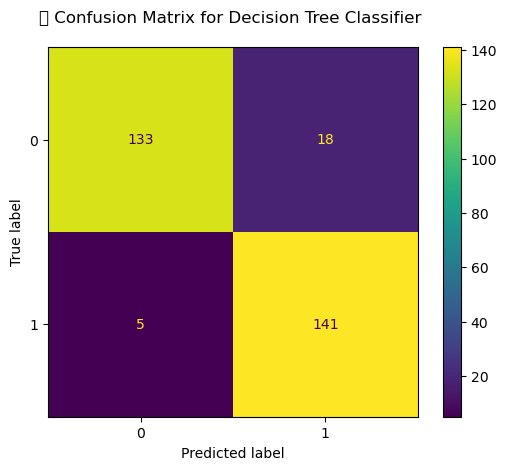

In [96]:
from sklearn import metrics
plt.style.use('default')

class_names = insur.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test)
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

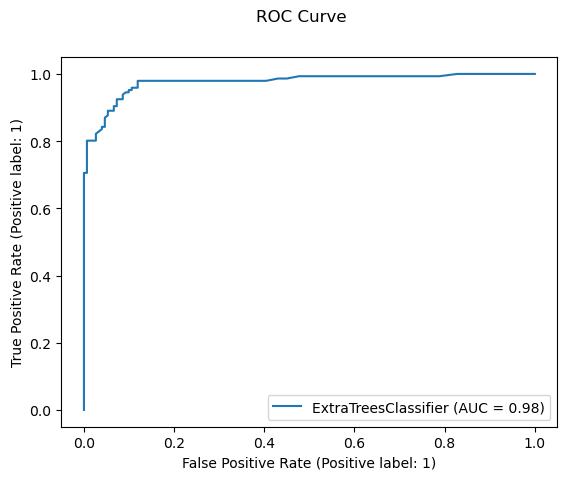

In [98]:
from sklearn.metrics import roc_curve,auc

plt.style.use('default')

disp = metrics.plot_roc_curve(FinalModel, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# saving the model

In [99]:
filename = "insuranceclaim_frauddetect.pkl"
joblib.dump(FinalModel, filename)

['insuranceclaim_frauddetect.pkl']